# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Exercise 2 | Fairness-aware AI

### 2a)

This template generates data about the working hours and salaries of n=5000 people. The salary equals working hours times salary-by-hour, where salary-by-hour is given by 100 units plus normal distributed noise. If you run the template, it produces a scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). A linear regression model learned from the data *without* the protected characteristic (gender) should have slope close to 100.0

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [2]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = hours * (100 + noise) (std.deviation 10)
sal = hrs * (100 + np.random.normal(0, 10, size=n))

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women (gender = 1) are shown with blue, men (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

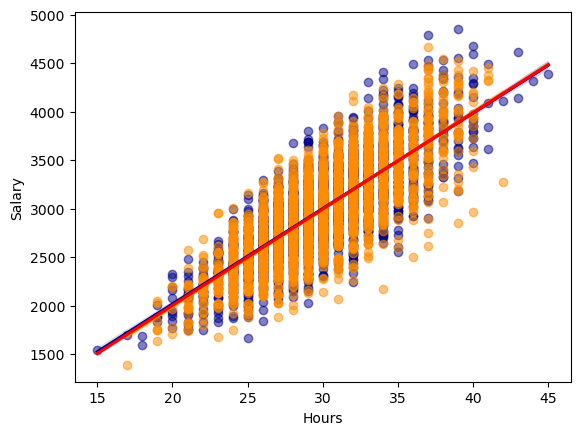

In [3]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Fit the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [4]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_)

slope: 99.3


### Three scenarios

Now edit the code to simulate the following scenarios:

i. the salary of women is reduced by 200 euros ("direct discrimination")

ii. the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45) ("no discrimination")

iii. both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

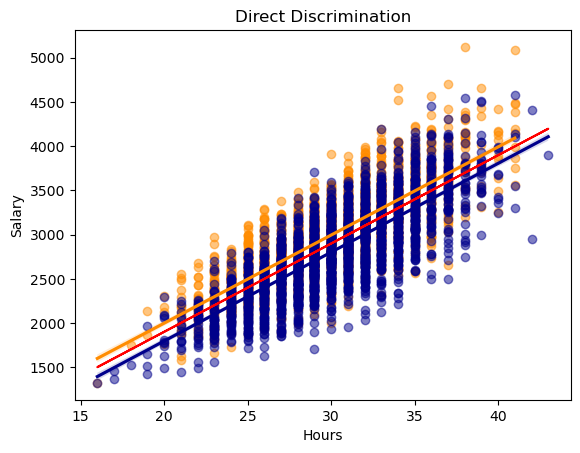

slope: 99.8


In [5]:
# Sample size n
n = 5000

# Gender
gen = np.random.binomial(1, 0.5, size=n)

hrs = np.random.binomial(60, 0.5, size=n)

# salary = hours * (100 + noise) (std.deviation 10)
salary_men = hrs * (100 + np.random.normal(0, 10, size=n))
salary_women= (hrs * (100 + np.random.normal(0, 10, size=n))) - 200

salaries_direct_discrimination = np.where(gen == 1, salary_women, salary_men)

data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": salaries_direct_discrimination})

def plot_and_fit(data):
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 0], color="darkOrange", scatter_kws={'alpha': 0.5})
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 1], color="darkBlue", scatter_kws={'alpha': 0.5})

    X = data[["Hours"]]
    y = data["Salary"]
    model = LinearRegression()
    model.fit(X, y)

    plt.plot(X, model.predict(X), color="red")
    plt.title('Direct Discrimination')
    plt.show()

    print("slope: %.1f" % model.coef_)

plot_and_fit(data)

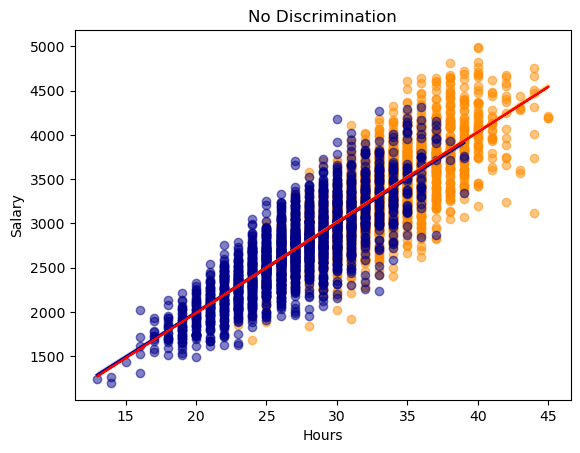

slope: 102.1


In [6]:
hrs_men = np.random.binomial(60, 0.55, size=n)
hrs_women = np.random.binomial(60, 0.45, size=n)

salary_men = hrs_men * (100 + np.random.normal(0, 10, size=n))
salary_women = hrs_women * (100 + np.random.normal(0, 10, size=n))

salaries_no_discrimination = np.where(gen == 1, salary_women, salary_men)


data = pd.DataFrame({"Gender": gen, "Hours": np.where(gen == 1, hrs_women, hrs_men), "Salary": salaries_no_discrimination})

def plot_and_fit(data):
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 0], color="darkOrange", scatter_kws={'alpha': 0.5})
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 1], color="darkBlue", scatter_kws={'alpha': 0.5})

    X = data[["Hours"]]
    y = data["Salary"]
    model = LinearRegression()
    model.fit(X, y)

    plt.plot(X, model.predict(X), color="red")
    plt.title('No Discrimination')
    plt.show()

    print("slope: %.1f" % model.coef_)

plot_and_fit(data)

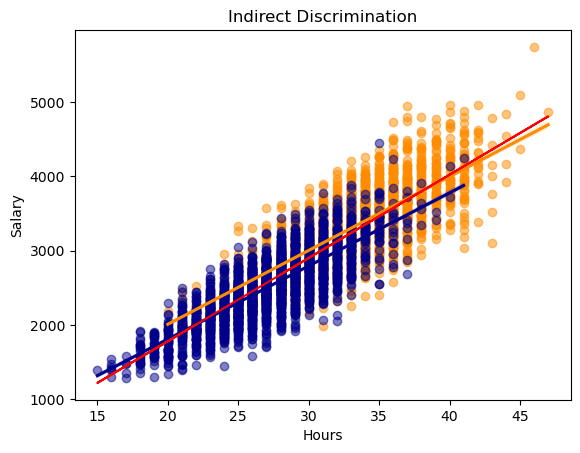

slope: 112.1


In [7]:
hrs_men = np.random.binomial(60, 0.55, size=n)
hrs_women = np.random.binomial(60, 0.45, size=n)

# salary
sal_men = hrs_men* (100 + np.random.normal(0, 10, size=n))
sal_women = (hrs_women * (100 + np.random.normal(0, 10, size=n))) - 200

salaries_indirect_discrimination = np.where(gen == 1, sal_women, sal_men)

data = pd.DataFrame({"Gender": gen, "Hours": np.where(gen == 1, hrs_women, hrs_men), "Salary": salaries_indirect_discrimination})

# Scenario 3
def plot_and_fit(data):
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 0], color="darkOrange", scatter_kws={'alpha': 0.5})
    sns.regplot(x="Hours", y="Salary", data=data[data["Gender"] == 1], color="darkBlue", scatter_kws={'alpha': 0.5})

    X = data[["Hours"]]
    y = data["Salary"]
    model = LinearRegression()
    model.fit(X, y)

    plt.plot(X, model.predict(X), color="red")
    plt.title('Indirect Discrimination')
    plt.show()

    print("slope: %.1f" % model.coef_)

plot_and_fit(data)


### 2b)

Explain the observations you make for exercise 2a) using the causal models on pp. 49-50 of the slides of Lecture 9 (i.e., the slides that are saying "Removing protected characteristic does not solve the problem, unless..").

In [8]:
# Write down your observations here.
print('In direct discrimination, the salary of women is decreased by a constant of 200. But all else is equal. In no discrimination, the salary is determined the amount of hours each gender works. So there is no problem. But in indirect discrimination, the salary of women is not based on the hours they work. The salary gets reduced by 200 unlike the salary for men. So this is a problem.')

In direct discrimination, the salary of women is decreased by a constant of 200. But all else is equal. In no discrimination, the salary is determined the amount of hours each gender works. So there is no problem. But in indirect discrimination, the salary of women is not based on the hours they work. The salary gets reduced by 200 unlike the salary for men. So this is a problem.


**Remember to submit your code on Moodle. You can return a Jupyter notebook (.ipynb) or a Python script with comments explaining your findings.**